# Taxi Fare Prediction

In the last few years, the number of for-hire vehicles operating in NY has grown from 
63,000 to more than 100,000. However, while the number of trips in app-based vehicles 
has increased from 6 million to 17 million a year, taxi trips have fallen from 11 million 
to 8.5 million. Hence, the NY Yellow Cab organization decided to become more data centric. Then we have apps like Uber, OLA, Lyft, Gett, etc. how do these apps work? After 
all, that set price is not a random guess.

## Problem Statement:
Given pickup and dropoff locations, the pickup timestamp, and the passenger count, the 
objective is to predict the fare of the taxi ride.

## Dataset Information: 

* unique_id:-  A unique identifier or key for each record in the dataset

* date_time_of_pickup:-  The time when the ride started

* longitude_of_pickup:-  Longitude of the taxi ride pickup point

* latitude_of_pickup:-  Latitude of the taxi ride pickup point

* longitude__of_dropoff:-  Longitude of the taxi ride dropoff point

* latitude_of_dropoff:-  Latitude of the taxi ride dropoff point

* no_of_passenger:-  count of the passengers during the ride

* amount (target variable):-  dollar amount of the cost of the taxi ride


#### Importing Data

In [70]:
import pandas as pd
import numpy as np

In [71]:
data=pd.read_csv('C:/Users/admin/Desktop/Imarticus/Machine learning DataSets/Taxi Fare Prediction/Dataset/taxi_fare_prediction_2.csv')

In [72]:
data.head()

,Unnamed: 0,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [73]:
data.tail()

,Unnamed: 0,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
10995,10995,23:48.0,2.9,2010-03-31 09:23:48 UTC,-74.016935,40.707520,-74.016073,40.711157,1
10996,10996,45:10.0,14.1,2012-03-31 22:45:10 UTC,-73.970027,40.752950,-74.015258,40.709115,4
10997,10997,36:00.0,4.5,2009-04-29 23:36:00 UTC,-73.986190,40.763322,-73.981965,40.771845,5
10998,10998,29:00.0,10.1,2009-09-15 21:29:00 UTC,-73.970222,40.793992,-73.939247,40.816070,1
10999,10999,04:26.0,9.7,2010-09-24 11:04:26 UTC,-73.999456,40.749233,-73.979556,40.751775,1


In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11000 entries, 0 to 10999
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Unnamed: 0            11000 non-null  int64  
 1   unique_id             11000 non-null  object 
 2   amount                11000 non-null  float64
 3   date_time_of_pickup   11000 non-null  object 
 4   longitude_of_pickup   10983 non-null  float64
 5   latitude_of_pickup    10986 non-null  float64
 6   longitude_of_dropoff  10986 non-null  float64
 7   latitude_of_dropoff   10989 non-null  float64
 8   no_of_passenger       11000 non-null  int64  
dtypes: float64(5), int64(2), object(2)
memory usage: 773.6+ KB


In [75]:
data.describe()

,Unnamed: 0,amount,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
count,11000.000000,11000.000000,10983.000000,10986.000000,10986.000000,10989.000000,11000.000000
mean,5499.500000,11.241357,-72.584572,39.969676,-72.557885,39.926788,1.641000
std,3175.570815,9.590382,10.213980,7.111952,10.301132,6.255057,1.268676
min,0.000000,-2.900000,-74.438233,-74.006893,-74.429332,-74.006377,0.000000
25%,2749.750000,6.000000,-73.992135,40.734721,-73.991112,40.735222,1.000000
50%,5499.500000,8.500000,-73.981807,40.752732,-73.980118,40.753895,1.000000
75%,8249.250000,12.500000,-73.967047,40.767500,-73.963695,40.768262,2.000000
max,10999.000000,180.000000,40.766125,401.083332,40.802437,41.366138,6.000000


In [76]:
data.describe(include='object')

,unique_id,date_time_of_pickup
count,11000,11000
unique,2975,10982
top,20:00.0,2012-05-23 14:22:00 UTC
freq,113,2


## Observation
There are unique approx. 3000 people who booked taxi.
The most no taxi being at 2 PM .

## Data Visualization

<AxesSubplot:>

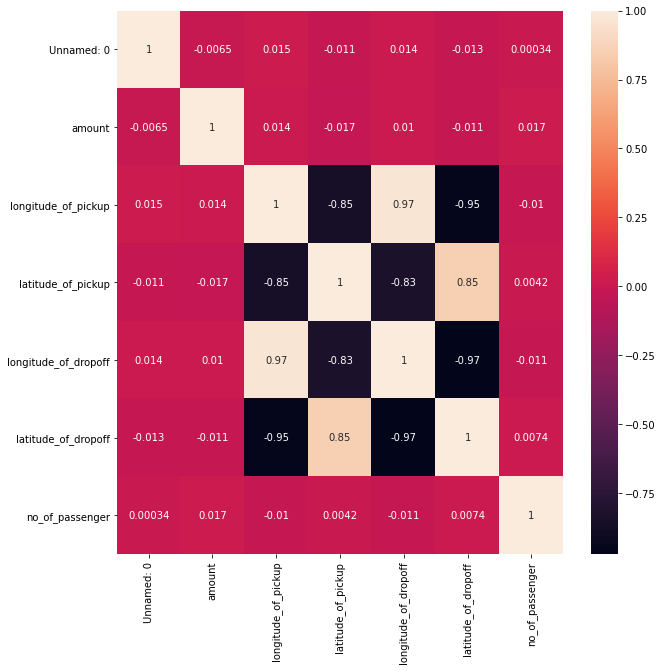

In [77]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
sns.heatmap(data.corr(),annot=True)

## Observation
It shows multicollinearity in data as longitude, latitude of pickup and drop are highly correlated with each other.
 

## 

In [78]:
#checking for missing values
data.isna().sum()

Unnamed: 0               0
unique_id                0
amount                   0
date_time_of_pickup      0
longitude_of_pickup     17
latitude_of_pickup      14
longitude_of_dropoff    14
latitude_of_dropoff     11
no_of_passenger          0
dtype: int64

In [79]:
## dropping the null values
data=data.dropna()

## 

In [80]:
data.head()

,Unnamed: 0,unique_id,amount,date_time_of_pickup,longitude_of_pickup,latitude_of_pickup,longitude_of_dropoff,latitude_of_dropoff,no_of_passenger
0,0,26:21.0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,1,52:16.0,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2,35:00.0,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,3,30:42.0,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,4,51:00.0,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


## 

### Feature Engineering

In [81]:
import datetime

In [82]:
data['date_time_of_pickup'] = pd.to_datetime(data['date_time_of_pickup']) - datetime.timedelta(hours = 4)

In [83]:
data['date_time_of_pickup'].head()

0   2009-06-15 13:26:21+00:00
1   2010-01-05 12:52:16+00:00
2   2011-08-17 20:35:00+00:00
3   2012-04-21 00:30:42+00:00
4   2010-03-09 03:51:00+00:00
Name: date_time_of_pickup, dtype: datetime64[ns, UTC]

In [84]:
data['Year'] = data['date_time_of_pickup'].dt.year
data['Month'] = data['date_time_of_pickup'].dt.month
data['Day'] = data['date_time_of_pickup'].dt.day
data['Hours'] = data['date_time_of_pickup'].dt.hour
data['Minutes'] = data['date_time_of_pickup'].dt.minute

In [85]:
data['mornight'] = np.where(data.Hours< 12, 0, 1)

## 

## Add Distance Between Pickup and Drop
We can use the haversine distance:

In [86]:
from sklearn.metrics.pairwise import haversine_distances

In [87]:
### Function

from math import radians, cos, sin, asin, sqrt

def haversine(data):
    """
    Calculate the great circle distance between two points 
    on the earth (specified in decimal degrees)
    """
    # convert decimal degrees to radians 
    lat1 = np.radians(data["latitude_of_pickup"])
    lat2 = np.radians(data["latitude_of_dropoff"])
    
    
    # Based on the formula x1= drop_lat, x2 = drop_long
    dlat = np.radians(data['latitude_of_dropoff'] - data['latitude_of_pickup'])
    dlong = np.radians(data['longitude_of_dropoff'] - data['longitude_of_pickup'])

    # haversine formula 
    # we will get the distance in kilometers by this formula 
    a = np.sin(dlat/2)**2 + np.cos(lat1) * np.cos(lat2) * np.sin(dlong/2)**2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1-a))
    r = 6371 # Radius of earth in kilometers. Use 3956 for miles
    return c * r

In [88]:
#New variable Total Distance
data['Total_distance'] = haversine(data)

In [89]:
# Dropping the unwanted variables from the data
data.drop(['unique_id','date_time_of_pickup','longitude_of_dropoff','latitude_of_pickup'],axis=1,inplace=True)

In [138]:
#data after feature engineering
data.head()

,Unnamed: 0,amount,longitude_of_pickup,latitude_of_dropoff,no_of_passenger,Year,Month,Day,Hours,Minutes,mornight,Total_distance
0,0,4.5,-73.844311,40.712278,1,2009,6,15,13,26,1,1.030764
1,1,16.9,-74.016048,40.782004,1,2010,1,5,12,52,1,8.450134
2,2,5.7,-73.982738,40.750562,2,2011,8,17,20,35,1,1.389525
3,3,7.7,-73.987130,40.758092,1,2012,4,21,0,30,0,2.799270
4,4,5.3,-73.968095,40.783762,1,2010,3,9,3,51,0,1.999157


In [90]:
# using groupby 
data.groupby('no_of_passenger')['Total_distance', 'amount'].mean()

<ipython-input-90-d50c323cce8e>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('no_of_passenger')['Total_distance', 'amount'].mean()


,Total_distance,amount
no_of_passenger,,
0,3.016702,9.365854
1,14.782733,11.039878
2,14.786198,12.172888
3,12.715714,11.421104
4,3.471259,11.482269
5,15.248604,11.227929
6,3.133642,11.856059


In [91]:
# max distance travelled 
data['Total_distance'].max()

8667.54210373151

In [92]:
# max amount paid 
data['amount'].max()

180.0

In [93]:
import seaborn as sns
import matplotlib.pyplot as plt

<AxesSubplot:>

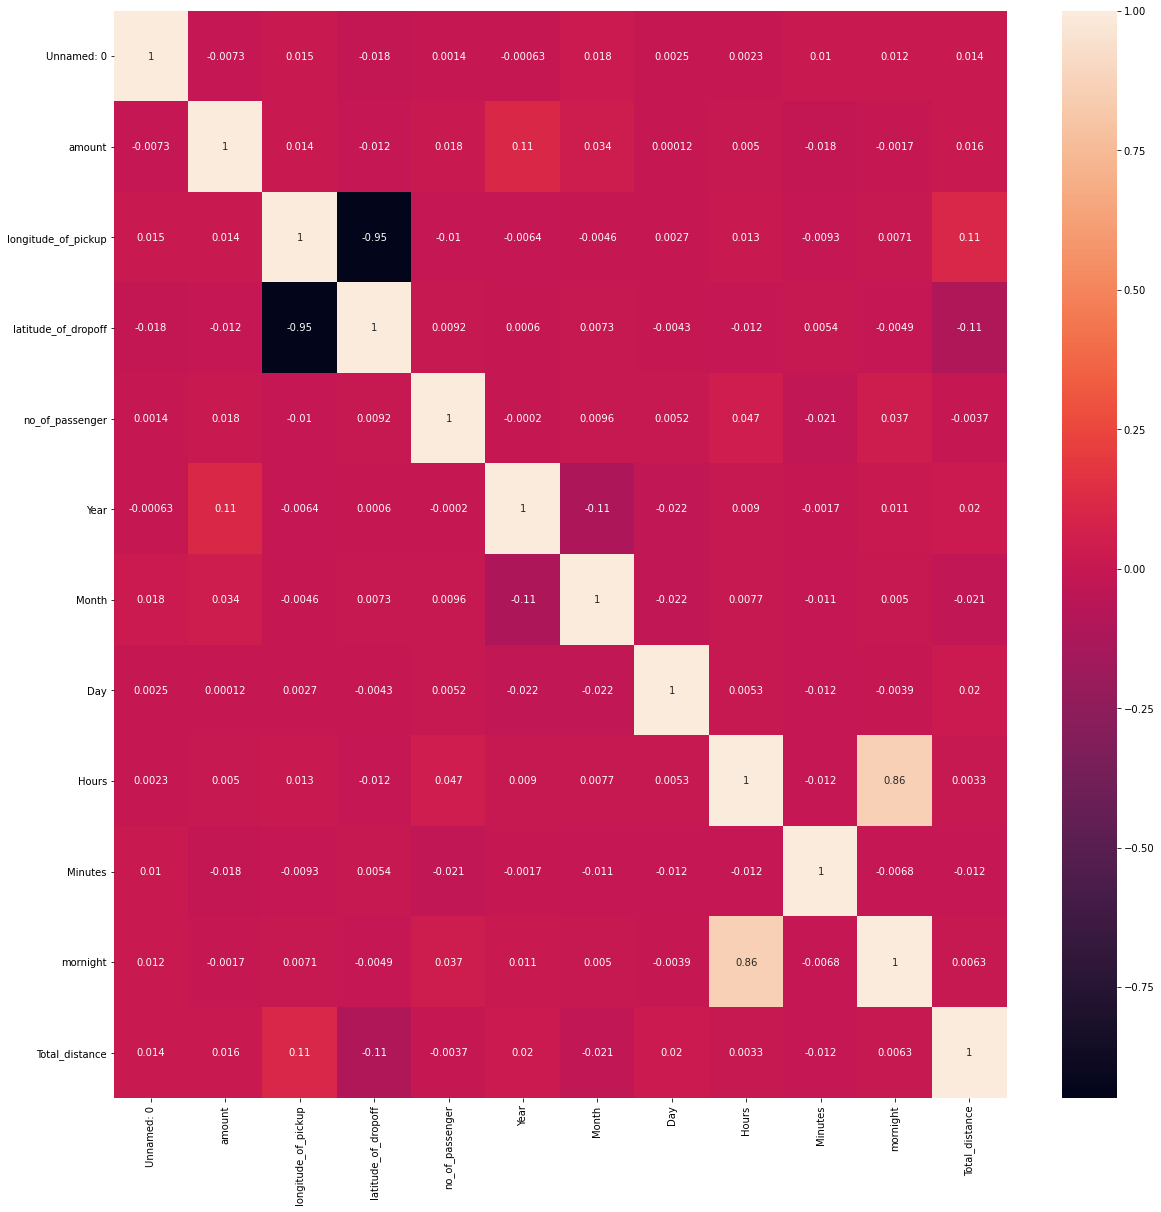

In [94]:
plt.figure(figsize=(20,20))
sns.heatmap(data.corr(),annot=True)

## Observation
1. There is high correlation between hours and mornight variables.(0.86)
2. While all the others variables in the data are highly correlated.

### Getting and Removing Outliers in Data

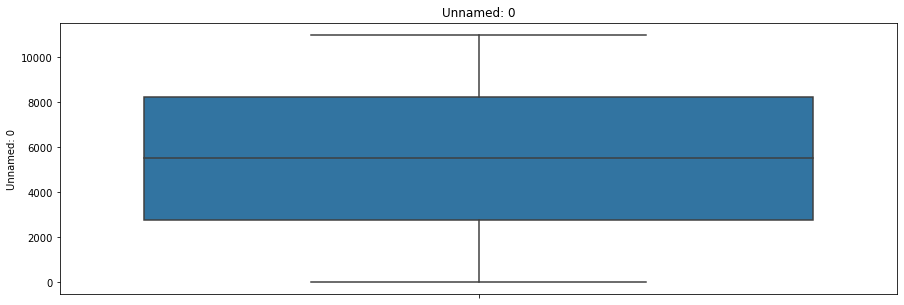

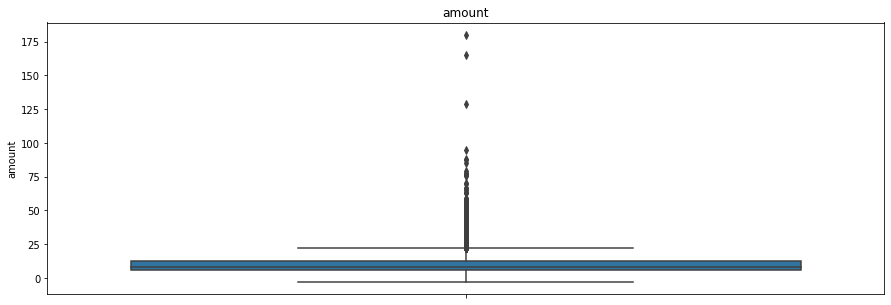

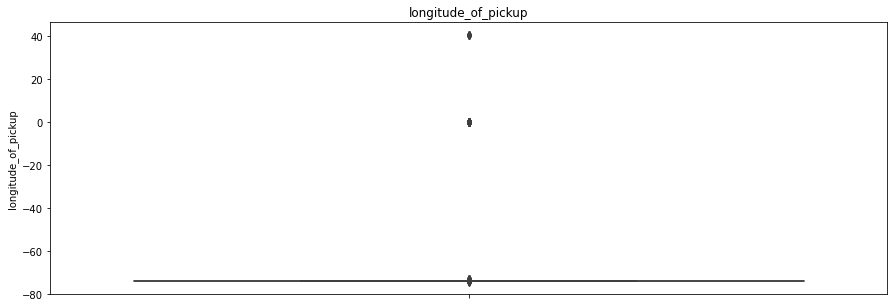

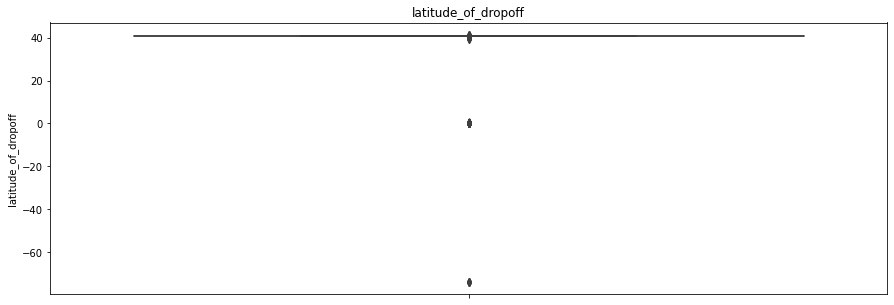

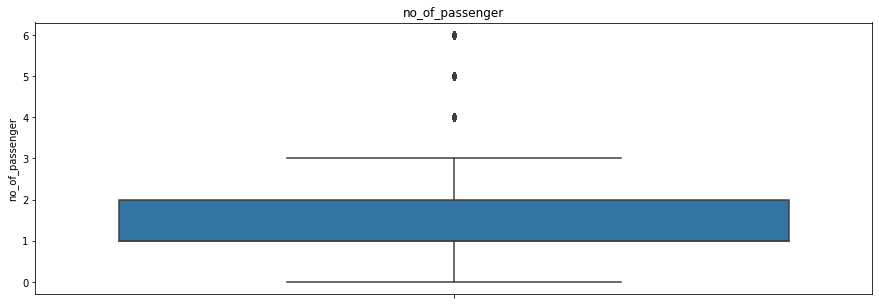

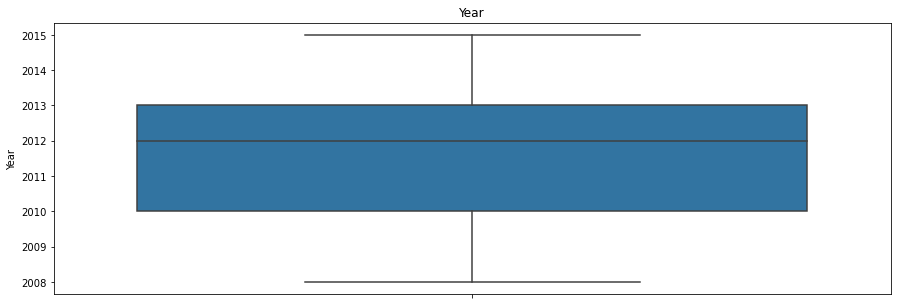

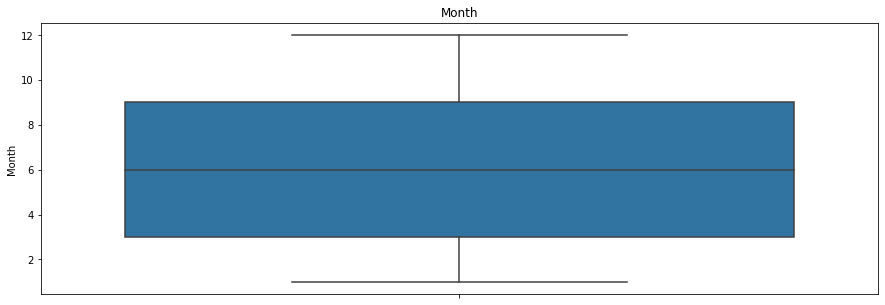

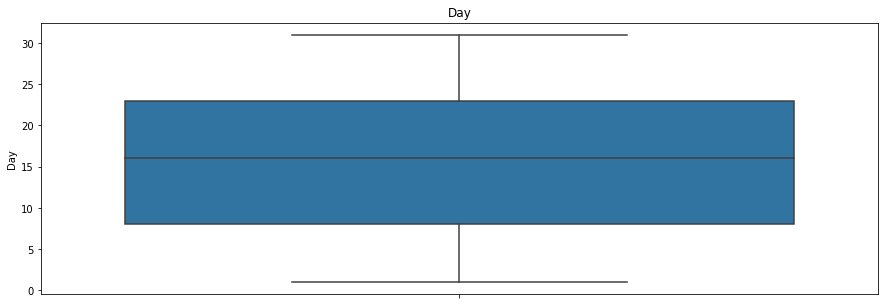

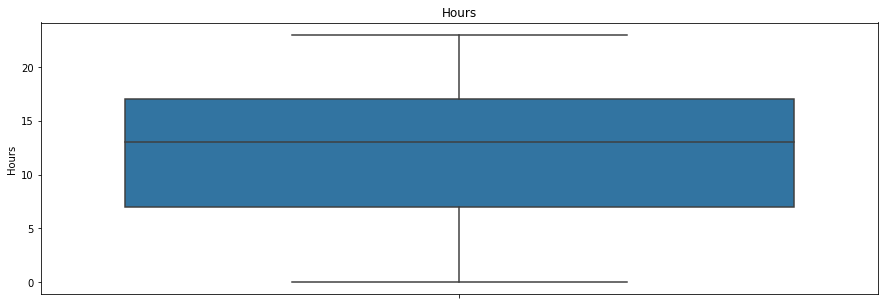

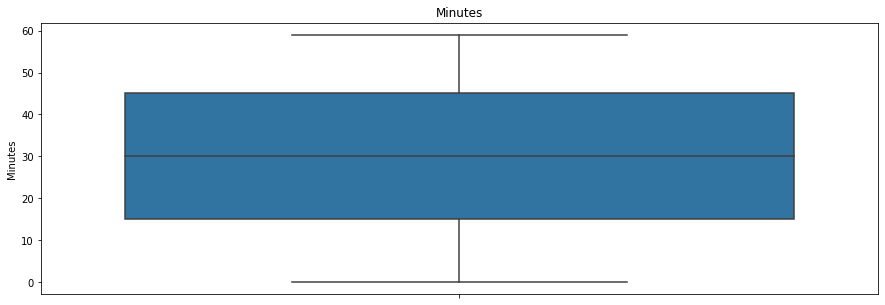

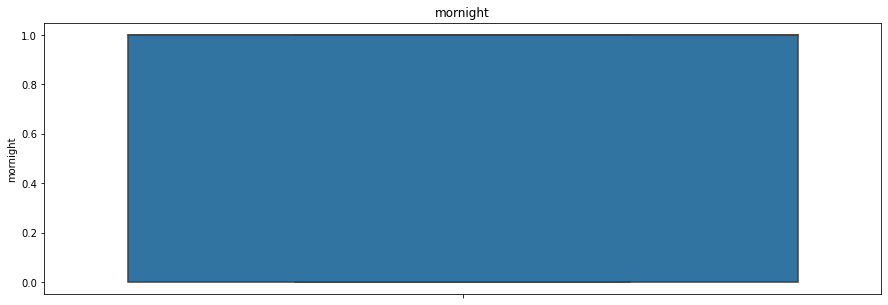

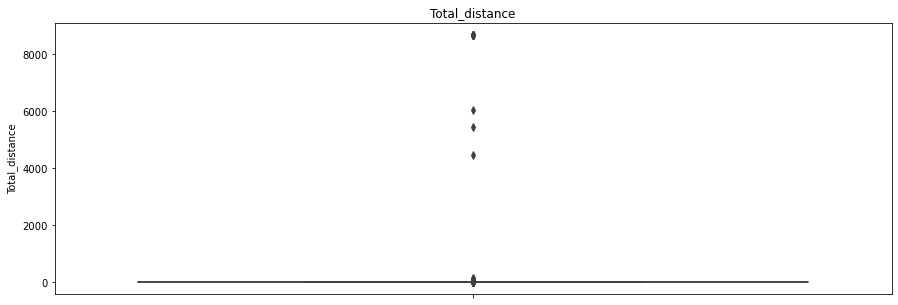

In [95]:
for i in data.columns:
    plt.figure(figsize=(15,5))
    sns.boxplot(y=i,data=data)
    plt.title(i)

In [96]:
# Check for the outliers
from scipy import stats
z = abs(stats.zscore(data))
print(z)

[[1.73653078 0.7030935  0.12334039 ... 0.21946995 0.92123758 0.04412623]
 [1.73621547 0.58923385 0.14015507 ... 1.28448723 0.92123758 0.01934853]
 [1.73590017 0.57802957 0.1368937  ... 0.30113061 0.92123758 0.04292812]
 ...
 [1.73091584 0.7030935  0.13723168 ... 0.35897512 0.92123758 0.04418788]
 [1.73123114 0.1194618  0.13566827 ... 0.04593643 0.92123758 0.03560938]
 [1.73154645 0.16114977 0.13853055 ... 1.4920491  1.08549632 0.04189134]]


In [97]:
threshold = 3
print(np.where(z>3))

(array([   32,    35,    57,    60,    64,    65,   102,   105,   108,
         128,   143,   184,   193,   199,   214,   227,   279,   302,
         308,   343,   357,   365,   382,   417,   427,   433,   439,
         498,   525,   526,   527,   528,   528,   530,   530,   540,
         556,   569,   604,   609,   636,   646,   671,   676,   703,
         722,   783,   793,   801,   830,   837,   856,   856,   865,
         865,   871,   871,   911,   912,   942,   942,   944,   944,
         949,   949,   968,   994,  1058,  1060,  1093,  1104,  1153,
        1156,  1159,  1164,  1164,  1200,  1203,  1215,  1243,  1243,
        1265,  1271,  1286,  1297,  1297,  1299,  1299,  1318,  1331,
        1345,  1371,  1380,  1380,  1387,  1390,  1414,  1424,  1424,
        1466,  1469,  1470,  1477,  1487,  1525,  1525,  1544,  1544,
        1577,  1578,  1578,  1602,  1620,  1620,  1633,  1664,  1664,
        1666,  1687,  1687,  1691,  1692,  1696,  1745,  1747,  1762,
        1762,  1766

In [98]:
# Remove the outliers
new_data = data[(z<3).all(axis=1)]
new_data.shape

(10305, 12)

## Building the Model(s)

In [99]:
from sklearn.model_selection import train_test_split

In [100]:
x=new_data.drop(['amount'],axis=1)
y=new_data['amount'].astype('int64')

In [101]:
#Splitting the Training and Testing data having 30% of Test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=123)

In [102]:
x_train.shape

(7213, 11)

###  Performing StandardScaler

In [103]:
#Scaling the data
from sklearn.preprocessing import StandardScaler

In [104]:
sc=StandardScaler()

In [105]:
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

## Linear Regression

In [106]:
import statsmodels.api as sm
# Fit the model to the training data and testing data
x_train_sm = sm.add_constant(x_train)
x_test_sm = sm.add_constant(x_test)
model = sm.OLS(y_train,x_train_sm)
results = model.fit()
# Making predictions using the model
linear_ypred = results.predict(x_test_sm)
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 amount   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.360
Method:                 Least Squares   F-statistic:                     369.4
Date:                Wed, 05 Jan 2022   Prob (F-statistic):               0.00
Time:                        10:44:49   Log-Likelihood:                -22092.
No. Observations:                7213   AIC:                         4.421e+04
Df Residuals:                    7201   BIC:                         4.429e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.7126      0.061    159.265      0.000       9.593       9.832
x1            -0.0999      0.061     -1.636      0.102      -0.220       0.020
x2            -0.0368      0.067     -0.549      0.583      -0.168       0.095
x3            -0.5298      0.062     -8.549      0.000      -0.651      -0.408
x4             0.1045      0.061      1.706      0.088      -0.016       0.225
x5             0.9864      0.062     16.025      0.000       0.866       1.107
x6             0.4410      0.061      7.181      0.000       0.321       0.561
x7             0.0136      0.061      0.223      0.824      -0.106       0.133
x8             0.1524      0.121      1.261      0.207      -0.084       0.389
x9            -0.0542      0.061     -0.889      0.374      -0.174       0.065
x10           -0.2200      0.121     -1.826      0.068      -0.456       0.016
x11            3.8052      0.067     57.019      0.000       3.674       3.936
==============================================================================
Omnibus:                     7481.307   Durbin-Watson:                   2.003
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          3741535.182
Skew:                          -4.404   Prob(JB):                         0.00
Kurtosis:                     114.228   Cond. No.                         3.70
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [107]:
from sklearn import metrics
linear_mse = metrics.mean_squared_error(y_test,linear_ypred)
linear_r2 = metrics.r2_score(y_test,linear_ypred)
from math import sqrt
linear_rmse = sqrt(linear_mse)
print('Mean_Squared_Error:',linear_mse)
print('Root_Mean_Squared_Error',linear_rmse)
print('r_squared_value:',linear_r2)

Mean_Squared_Error: 19.688015386042704
Root_Mean_Squared_Error 4.4371179143722
r_squared_value: 0.5159814642491618


## 

## Decision Tree

In [108]:
from sklearn.tree import DecisionTreeRegressor

In [109]:
dt=DecisionTreeRegressor()

In [110]:
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [111]:
ypred=dt.predict(x_test)

In [112]:
ypred[0:5]

array([6., 8., 8., 7., 7.])

In [113]:
from sklearn import metrics

In [114]:
dt_mse = metrics.mean_squared_error(y_test, ypred)
dt_rmse = sqrt(dt_mse)
r_squared_dt = metrics.r2_score(y_test,ypred)
print('Mean_Squared_Error:',dt_mse)
print('Root_Mean_Squared_Error',dt_rmse)
print('R2_for_rf:',r_squared_dt)

Mean_Squared_Error: 22.076002587322122
Root_Mean_Squared_Error 4.698510677578813
R2_for_rf: 0.4572741722295508


## 

### RandomForest

In [115]:
from sklearn.ensemble import RandomForestRegressor

In [116]:
rf=RandomForestRegressor()

In [117]:
rf.fit(x_train,y_train)

RandomForestRegressor()

In [118]:
ypred1=rf.predict(x_test)

In [119]:
print(ypred1.shape)
print(ypred1[0:5])

(3092,)
[8.76 6.44 8.48 6.96 4.31]


In [120]:
from sklearn import metrics

In [121]:
# Model performance metrics
from math import sqrt

rf_mse = metrics.mean_squared_error(y_test, ypred1)
rf_rmse = sqrt(rf_mse)
r_squared_rf = metrics.r2_score(y_test,ypred1)
print('Mean_Squared_Error:',rf_mse)
print('Root_Mean_Squared_Error',rf_rmse)
print('R2_for_rf:',r_squared_rf)

Mean_Squared_Error: 12.123989327296249
Root_Mean_Squared_Error 3.481951942129048
R2_for_rf: 0.7019386948561179


### Random Forest with Hyperparameter Tunning

In [122]:
# Tuning hyperparameters for RandomForestRegressor model
from sklearn.model_selection import RandomizedSearchCV
parameter_grid = \
    {
        "n_estimators": [10,100,200,300],
        "criterion": ["mse"],
         "max_features": ['auto'],
        "max_depth": [ 20,30],
        "min_samples_split": [2, 5,7],
        "min_samples_leaf": [1,2,5],
        "bootstrap": [True, False],
    }

clf = RandomizedSearchCV(RandomForestRegressor(random_state=3), 
                         parameter_grid, cv=3, n_jobs=4, 
                         n_iter=10, random_state=3)

clf.fit(x_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 20, 'criterion': 'mse', 'bootstrap': True}


In [123]:
# Use best parameters to train the model
rf_model = RandomForestRegressor(**clf.best_params_)
# Fit the model to training data
rf_model.fit(x_train, y_train)
rf_ypred1 = rf_model.predict(x_test)

In [124]:
# Model performance metrics
rf_mse1 = metrics.mean_squared_error(y_test, rf_ypred1)
rf_rmse1 = sqrt(rf_mse)
r_squared_rf2 = metrics.r2_score(y_test,rf_ypred1)
print('Mean_Squared_Error:',rf_mse1)
print('Root_Mean_Squared_Error',rf_rmse1)
print('R2_for_rf:',r_squared_rf2)

Mean_Squared_Error: 12.142927526492118
Root_Mean_Squared_Error 3.481951942129048
R2_for_rf: 0.7014731101201857


##  Support Vector Machines (Regressor)

In [125]:
from sklearn.svm import SVR

In [126]:
svcregressor = SVR(kernel='rbf')

In [127]:
svcregressor.fit(x_train,y_train)

SVR()

In [128]:
y_pred3 = svcregressor.predict(x_test)

In [129]:
# Model performance metrics
svr_mse = metrics.mean_squared_error(y_test, y_pred3)
svr_rmse = sqrt(rf_mse)
r_squared_svr = metrics.r2_score(y_test,y_pred3)
print('Mean_Squared_Error:',svr_mse)
print('Root_Mean_Squared_Error',svr_rmse)
print('R2_for_rf:',r_squared_svr)

Mean_Squared_Error: 11.188954914078804
Root_Mean_Squared_Error 3.481951942129048
R2_for_rf: 0.7249259781697521


## SVM with Hyperparameter Tunning

In [130]:
# Tuning hyperparameters for SVM model
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR

parameter_space = \
    {
        "kernel": [ "rbf", "sigmoid"],
        "degree": [3, 5],
        "gamma":[0.01,0.1,1],
        "C": [1, 10],
    }

clf = RandomizedSearchCV(SVR(), parameter_space, cv=3, n_jobs=4)

clf.fit(x_train, y_train)
print("Best parameters:")
print(clf.best_params_)

Best parameters:
{'kernel': 'rbf', 'gamma': 0.01, 'degree': 5, 'coef0': 0, 'C': 1}


In [131]:
# Use best parameters to train the SVM model 
svr_model = SVR(**clf.best_params_)
# Fit the model to training data
svr_model.fit(x_train, y_train)
# Making predictions using the model
svm_ypred = svr_model.predict(x_test)

In [132]:
# Model performance metrics
svm_mse = metrics.mean_squared_error(y_test, svm_ypred)
svm_rmse = sqrt(svm_mse)
r_squared_svm = metrics.r2_score(y_test,svm_ypred)
print('Mean_Squared_Error:',svm_mse)
print('Root_Mean_Squared_Error',svm_rmse)
print('R2_for_svm:',r_squared_svm)

Mean_Squared_Error: 9.520676391542175
Root_Mean_Squared_Error 3.0855593320404933
R2_for_svm: 0.7659396462246435


## XG Boost Regressor

In [133]:
from xgboost import XGBRegressor

In [134]:
# Instantiation
xgb_r =XGBRegressor(objective ='reg:linear',
                  n_estimators = 10, seed = 123)

In [135]:
# Fitting the model
xgb_r.fit(x_train, y_train)
  
# Predict the model
pred = xgb_r.predict(x_test)

[10:46:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/objective/regression_obj.cu:188: reg:linear is now deprecated in favor of reg:squarederror.


In [136]:
# Model performance metrics
xgb_mse = metrics.mean_squared_error(y_test,pred)
xgb_rmse = sqrt(xgb_mse)
r_squared_xgb = metrics.r2_score(y_test,pred)
print('Mean_Squared_Error:',xgb_mse)
print('Root_Mean_Squared_Error',xgb_rmse)
print('R2_for XGB:',r_squared_xgb)

Mean_Squared_Error: 11.397556648890664
Root_Mean_Squared_Error 3.376026754765232
R2_for XGB: 0.7197976244855966


## 

## Model Evaluation

In [137]:
# Compare model performance
Model_performance = pd.DataFrame({'Method':['Linear Regression','Decision Tree','Random Forest','Rf Hyperparameter','Support Vector Machines','SVM Hyperparameter','XGBoost Regressor'],
                       'Accuracy':[linear_r2 ,r_squared_dt,r_squared_rf,r_squared_rf2,r_squared_svr,r_squared_svm,r_squared_xgb]})
Model_performance 

,Method,Accuracy
0,Linear Regression,0.515981
1,Decision Tree,0.457274
2,Random Forest,0.701939
3,Rf Hyperparameter,0.701473
4,Support Vector Machines,0.724926
5,SVM Hyperparameter,0.765940
6,XGBoost Regressor,0.719798


### We can conclude from above dataframe that, the accuracy of the SVM Hyperprameter has higher accuracy than other models. Hence, The optimum model is SVM Hyperparameter with accuracy  ~ 77%.

## 

### Possible improvements

Try to scale up to use more training samples, right now we only use ~20% of the dataset.